# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
#box scores for every game 2000-2019
#players on each team of that game and their performance (player per row)
df=pd.read_csv("players_00_19.csv")
#list of all the games and the final score 2000-2019 (game per row)
df_s=pd.read_csv('seasons_00_19.csv')
#the combined information of players on each team and who won per game (game per row)
df_pa=pd.read_csv("playerAttendance.csv")
#elo data
df_elo=pd.read_csv("elo_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1. df

In [ ]:
#players/box scores
df.head()

,Unnamed: 0,GAMEID,TEAM,PLAYER,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,0.0,19991102CHHORL,CHH,Eddie Jones,42:00,8,22,.364,2,4,...,2,5,7,2,4,1,3,4,24,+25
1,1.0,19991102CHHORL,CHH,David Wesley,32:45,5,11,.455,2,5,...,0,4,4,9,5,0,4,2,16,+14
2,2.0,19991102CHHORL,CHH,Anthony Mason,32:13,3,5,.600,0,0,...,3,5,8,3,0,0,2,4,7,+17
3,3.0,19991102CHHORL,CHH,Elden Campbell,31:38,4,10,.400,0,0,...,4,5,9,2,0,3,2,3,9,+14
4,4.0,19991102CHHORL,CHH,Bobby Phills,30:38,8,16,.500,4,8,...,1,4,5,4,2,0,2,4,20,+20


In [ ]:
#simplify information
df_new=df[['GAMEID', 'TEAM', 'PLAYER', 'MP']]
df_new.head()

,GAMEID,TEAM,PLAYER,MP
0,19991102CHHORL,CHH,Eddie Jones,42:00
1,19991102CHHORL,CHH,David Wesley,32:45
2,19991102CHHORL,CHH,Anthony Mason,32:13
3,19991102CHHORL,CHH,Elden Campbell,31:38
4,19991102CHHORL,CHH,Bobby Phills,30:38


In [ ]:
#how many games the teams played
team_value_count=df_new['TEAM'].value_counts() / 8.0
team_value_count

SAS     1624.000
UTA     1624.000
CLE     1624.000
MIN     1623.875
MIL     1623.875
ATL     1623.875
PHI     1623.750
HOU     1623.750
LAC     1623.750
WAS     1623.750
LAL     1623.750
DAL     1623.625
DEN     1623.625
DET     1623.625
CHI     1623.500
TOR     1623.125
BOS     1623.000
IND     1622.750
ORL     1622.500
POR     1622.500
MIA     1622.500
SAC     1622.500
PHO     1622.125
GSW     1621.875
NYK     1621.750
MEM     1459.750
NJN     1049.625
OKC      886.000
CHA      804.000
SEA      737.875
NOH      722.000
BRK      573.875
NOP      491.875
CHO      410.000
CHH      245.875
VAN      164.000
NOK      163.500
TEAM       2.125
Name: TEAM, dtype: float64

No handles with labels found to put in legend.


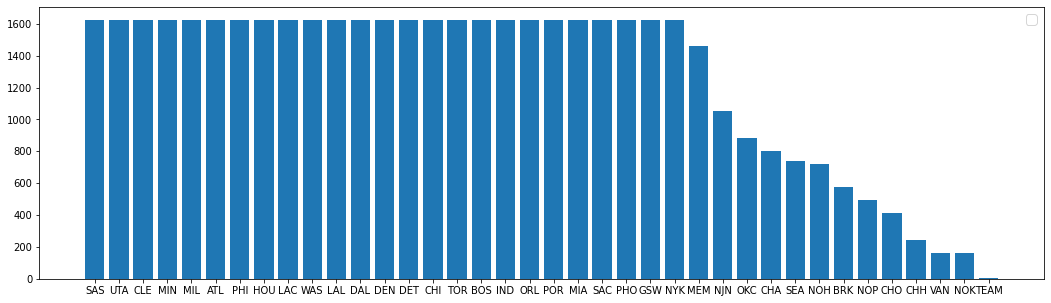

In [ ]:
#graphed information
f, ax = plt.subplots(figsize=(18,5)) 
plt.bar(x=team_value_count.index, height=team_value_count.values)
ax.legend(fontsize = 14)

In [ ]:
#check for team case
df_new[df_new['TEAM']=="TEAM"]

,GAMEID,TEAM,PLAYER,MP


In [ ]:
#remove team case
df_new=df_new[df_new['TEAM']!="TEAM"]
df_new

,GAMEID,TEAM,PLAYER,MP
0,19991102CHHORL,CHH,Eddie Jones,42:00
1,19991102CHHORL,CHH,David Wesley,32:45
2,19991102CHHORL,CHH,Anthony Mason,32:13
3,19991102CHHORL,CHH,Elden Campbell,31:38
4,19991102CHHORL,CHH,Bobby Phills,30:38
...,...,...,...,...
386331,20190410PORSAC,SAC,Nemanja Bjelica,11:55
386332,20190410PORSAC,SAC,Marvin Bagley III,30:15
386333,20190410PORSAC,SAC,Yogi Ferrell,28:39
386334,20190410PORSAC,SAC,Bogdan Bogdanović,27:16


In [ ]:
#check null
df_new.isnull().sum()

GAMEID    1
TEAM      1
PLAYER    1
MP        1
dtype: int64

In [ ]:
#fix null
df_new.dropna(inplace=True)
df_new.isnull().sum()

GAMEID    0
TEAM      0
PLAYER    0
MP        0
dtype: int64

In [ ]:
#find player count (how many games played)
player_counts=df_new["PLAYER"].value_counts()
player_counts

Dirk Nowitzki     1447
Vince Carter      1391
Jason Terry       1292
Paul Pierce       1261
Tim Duncan        1259
                  ... 
Jeff Foote           1
Jerry Smith          1
Vernon Macklin       1
Derrick Byars        1
Gary Trent Jr.       1
Name: PLAYER, Length: 1744, dtype: int64

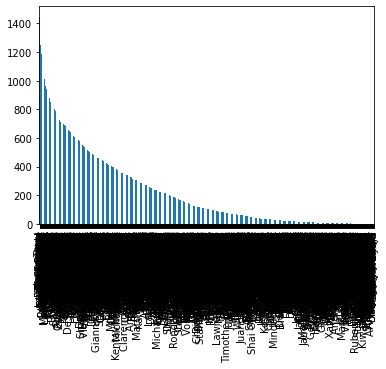

In [ ]:
#plot player count 
player_counts.plot.bar()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

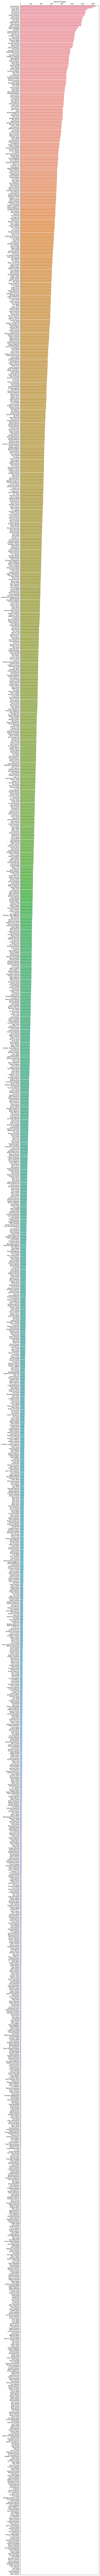

In [ ]:
#better plot for player count
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
f, ax = plt.subplots(figsize = (10,335))
ax.set_title('Games Played') 
sns.barplot(y=player_counts.index, x=player_counts.values)

# 2. df_pa

In [ ]:
#check player attandance
df_pa.head()

,Unnamed: 0,Home1,Home2,Home3,Home4,Home5,Home6,Home7,Home8,Away1,Away2,Away3,Away4,Away5,Away6,Away7,Away8,HomeWin
0,0,Eddie Jones,David Wesley,Anthony Mason,Elden Campbell,Bobby Phills,Baron Davis,Derrick Coleman,Brad Miller,Bo Outlaw,Darrell Armstrong,Michael Doleac,Darrell Armstrong,Ben Wallace,Chris Gatling,Corey Maggette,Chucky Atkins,True
1,1,Erick Strickland,Michael Finley,Robert Pack,Dirk Nowitzki,Sean Rooks,Cedric Ceballos,Steve Nash,Hubert Davis,Vonteego Cummings,Chris Mills,Antawn Jamison,Tony Farmer,Adonal Foyle,John Starks,Terry Cummings,Donyell Marshall,True
2,2,Ron Mercer,Nick Van Exel,Antonio McDyess,Raef LaFrentz,James Posey,George McCloud,Roy Rogers,Ryan Bowen,Clifford Robinson,Tom Gugliotta,Jason Kidd,Shawn Marion,Luc Longley,Rodney Rogers,Randy Livingston,Oliver Miller,True
3,3,Steve Francis,Charles Barkley,Hakeem Olajuwon,Shandon Anderson,Walt Williams,Cuttino Mobley,Kelvin Cato,Bryce Drew,Sam Cassell,Glenn Robinson,Ray Allen,Dell Curry,Robert Traylor,Danny Manning,Vinny Del Negro,Tim Thomas,False
4,4,Lamar Odom,Derek Anderson,Michael Olowokandi,Maurice Taylor,Eric Murdock,Tyrone Nesby,Troy Hudson,Brian Skinner,Gary Payton,Vin Baker,Horace Grant,Brent Barry,Ruben Patterson,Vernon Maxwell,Rashard Lewis,Jelani McCoy,False


In [ ]:
#check columns
df_pa.columns

Index(['Unnamed: 0', 'Home1', 'Home2', 'Home3', 'Home4', 'Home5', 'Home6',
       'Home7', 'Home8', 'Away1', 'Away2', 'Away3', 'Away4', 'Away5', 'Away6',
       'Away7', 'Away8', 'HomeWin'],
      dtype='object')

In [ ]:
#removed unnamed column
df_pa=df_pa[['Home1', 'Home2', 'Home3', 'Home4', 'Home5', 'Home6',
       'Home7', 'Home8', 'Away1', 'Away2', 'Away3', 'Away4', 'Away5', 'Away6',
       'Away7', 'Away8', 'HomeWin']]
df_pa

,Home1,Home2,Home3,Home4,Home5,Home6,Home7,Home8,Away1,Away2,Away3,Away4,Away5,Away6,Away7,Away8,HomeWin
0,Eddie Jones,David Wesley,Anthony Mason,Elden Campbell,Bobby Phills,Baron Davis,Derrick Coleman,Brad Miller,Bo Outlaw,Darrell Armstrong,Michael Doleac,Darrell Armstrong,Ben Wallace,Chris Gatling,Corey Maggette,Chucky Atkins,True
1,Erick Strickland,Michael Finley,Robert Pack,Dirk Nowitzki,Sean Rooks,Cedric Ceballos,Steve Nash,Hubert Davis,Vonteego Cummings,Chris Mills,Antawn Jamison,Tony Farmer,Adonal Foyle,John Starks,Terry Cummings,Donyell Marshall,True
2,Ron Mercer,Nick Van Exel,Antonio McDyess,Raef LaFrentz,James Posey,George McCloud,Roy Rogers,Ryan Bowen,Clifford Robinson,Tom Gugliotta,Jason Kidd,Shawn Marion,Luc Longley,Rodney Rogers,Randy Livingston,Oliver Miller,True
3,Steve Francis,Charles Barkley,Hakeem Olajuwon,Shandon Anderson,Walt Williams,Cuttino Mobley,Kelvin Cato,Bryce Drew,Sam Cassell,Glenn Robinson,Ray Allen,Dell Curry,Robert Traylor,Danny Manning,Vinny Del Negro,Tim Thomas,False
4,Lamar Odom,Derek Anderson,Michael Olowokandi,Maurice Taylor,Eric Murdock,Tyrone Nesby,Troy Hudson,Brian Skinner,Gary Payton,Vin Baker,Horace Grant,Brent Barry,Ruben Patterson,Vernon Maxwell,Rashard Lewis,Jelani McCoy,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24025,Damyean Dotson,Luke Kornet,Kevin Knox,Mitchell Robinson,Mario Hezonja,Kadeem Allen,John Jenkins,Isaiah Hicks,Andre Drummond,Reggie Jackson,Bruce Brown,Thon Maker,Wayne Ellington,Glenn Robinson III,Luke Kennard,Langston Galloway,False
24026,Zhaire Smith,Boban Marjanović,T.J. McConnell,Mike Scott,Furkan Korkmaz,Jonathon Simmons,Shake Milton,Amir Johnson,Ryan Arcidiacono,Timothé Luwawu-Cabarrot,Wayne Selden,Robin Lopez,Shaquille Harrison,Walt Lemon Jr.,Brandon Sampson,Cristiano Felício,True
24027,LaMarcus Aldridge,DeMar DeRozan,Derrick White,Bryn Forbes,Jakob Poeltl,Rudy Gay,Donatas Motiejūnas,Patty Mills,Devin Harris,Dwight Powell,Dirk Nowitzki,Jalen Brunson,Justin Jackson,Dorian Finney-Smith,Courtney Lee,Salah Mejri,True
24028,Gary Harris,Nikola Jokić,Jamal Murray,Will Barton,Paul Millsap,Monte Morris,Malik Beasley,Mason Plumlee,Andrew Wiggins,Gorgui Dieng,Tyus Jones,Dario Šarić,Josh Okogie,Cameron Reynolds,Anthony Tolliver,Keita Bates-Diop,True


In [ ]:
#check for duplicate
df_pa.duplicated().sum()

0

In [ ]:
#remove home win
df_pa_onlyteam=df_pa[['Home1', 'Home2', 'Home3', 'Home4', 'Home5', 'Home6',
       'Home7', 'Home8', 'Away1', 'Away2', 'Away3', 'Away4', 'Away5', 'Away6',
       'Away7', 'Away8']]

In [ ]:
#check for duplicate again
df_pa_onlyteam.duplicated().sum()

0

In [ ]:
#count the total number f home wins
value_count=df_pa['HomeWin'].value_counts()
value_count

True     14348
False     9682
Name: HomeWin, dtype: int64

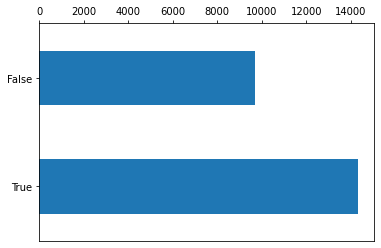

In [ ]:
value_count.plot.barh()

In [ ]:
#find base percentage of home wins
value_count[1] / (value_count[0] + value_count[1])

0.5970869746150645

In [ ]:
#separate to only home teams and find duplicates
df_pa_home=df_pa[['Home1', 'Home2', 'Home3', 'Home4', 'Home5', 'Home6',
       'Home7', 'Home8']]

df_pa_home.duplicated().sum()

388

In [ ]:
#separate to only away teams and find duplicates
df_pa_away=df_pa[['Away1', 'Away2', 'Away3', 'Away4', 'Away5', 'Away6',
       'Away7', 'Away8']]

df_pa_away.duplicated().sum()

377

# 3. df_s

In [ ]:
#look at games table
df_s.head()

,Unnamed: 0,DATE,VISITOR,VISITOR_PTS,HOME,HOME_PTS
0,0,1999-11-02,Orlando Magic,86,Charlotte Hornets,100
1,1,1999-11-02,Golden State Warriors,96,Dallas Mavericks,108
2,2,1999-11-02,Phoenix Suns,102,Denver Nuggets,107
3,3,1999-11-02,Milwaukee Bucks,98,Houston Rockets,93
4,4,1999-11-02,Seattle SuperSonics,104,Los Angeles Clippers,92


In [ ]:
#check games table columns
df_s.columns

Index(['Unnamed: 0', 'DATE', 'VISITOR', 'VISITOR_PTS', 'HOME', 'HOME_PTS'], dtype='object')

In [ ]:
#view only the team names
df_s=df_s[['VISITOR', 'HOME']]
df_s.head()

,VISITOR,HOME
0,Orlando Magic,Charlotte Hornets
1,Golden State Warriors,Dallas Mavericks
2,Phoenix Suns,Denver Nuggets
3,Milwaukee Bucks,Houston Rockets
4,Seattle SuperSonics,Los Angeles Clippers


In [ ]:
#check for duplicate games team wise
df_s.duplicated().sum()

22934

# df_elo

In [ ]:
df_elo.head()

,Unnamed: 0,Date,Team,Elo
0,0,2010-01-01,ATL,1500.000000
1,39,2010-01-04,ATL,1487.198700
2,62,2010-01-06,ATL,1480.000000
3,86,2010-01-08,ATL,1487.064939
4,107,2010-01-09,ATL,1495.148767


In [ ]:
df_elo['Team'].unique()

array(['ATL', 'BOS', 'BRK', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NJN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC',
       'SAS', 'TOR', 'UTA', 'WAS'], dtype=object)

In [ ]:
list_of_df = []
for i in df_elo['Team'].unique():
  print(i)
  temp_df = DataFrame(columns = df_elo.columns)
  for index, row in df_elo.iterrows():
    if row['Team'] == i:
      temp_df.loc[len(temp_df)] = row
  list_of_df.append(temp_df)

ATL
BOS
BRK
CHA
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NJN
NOP
NYK
OKC
ORL
PHI
PHO
POR
SAC
SAS
TOR
UTA
WAS


In [ ]:
print(list_of_df[1])

    Unnamed: 0        Date Team          Elo
0           14  2010-01-02  BOS  1500.000000
1           69  2010-01-06  BOS  1507.198700
2           87  2010-01-08  BOS  1519.657078
3          121  2010-01-10  BOS  1511.573250
4          132  2010-01-11  BOS  1524.744996
..         ...         ...  ...          ...
740      21524  2019-04-01  BOS  1564.049968
741      21557  2019-04-03  BOS  1569.816706
742      21581  2019-04-05  BOS  1580.721354
743      21616  2019-04-07  BOS  1592.841036
744      21631  2019-04-09  BOS  1578.015162

[745 rows x 4 columns]


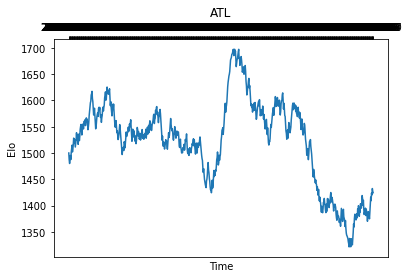

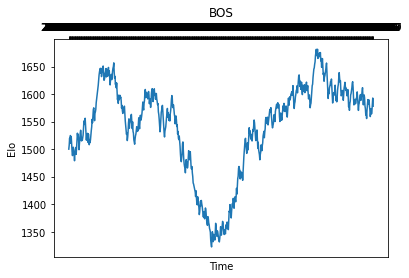

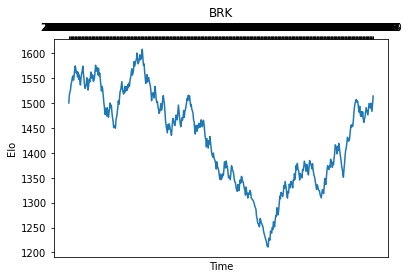

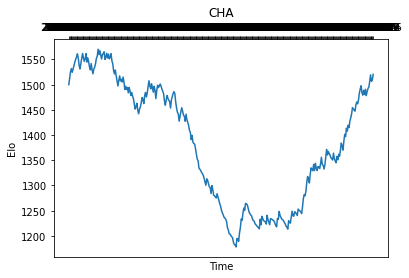

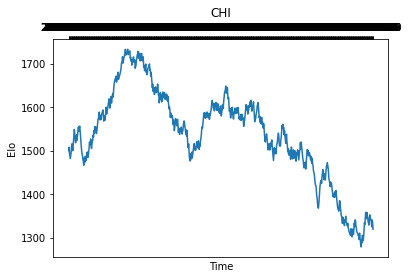

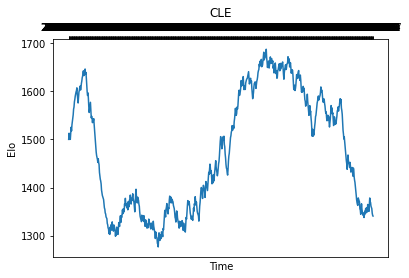

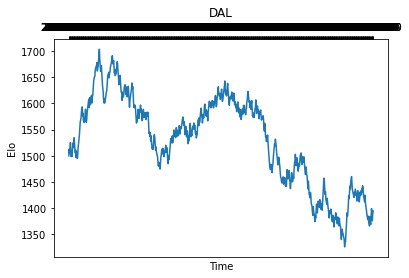

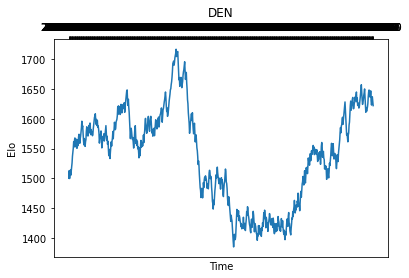

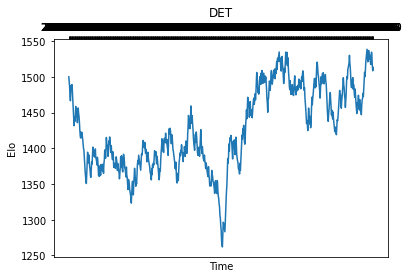

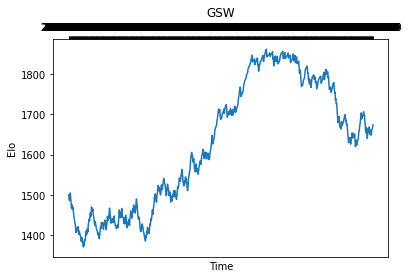

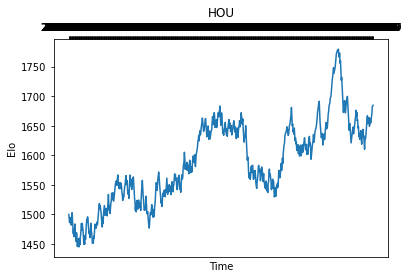

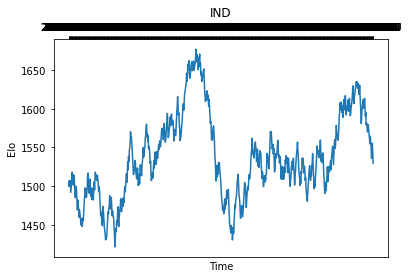

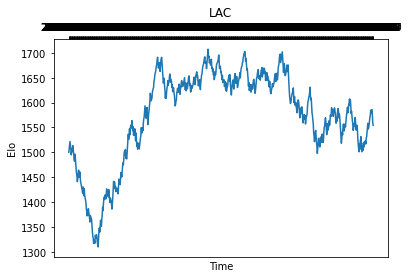

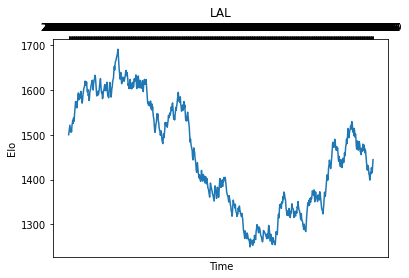

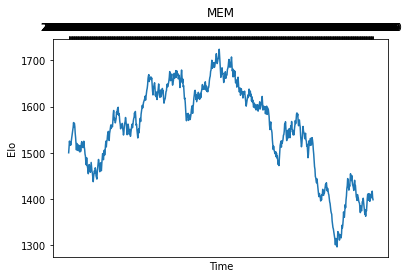

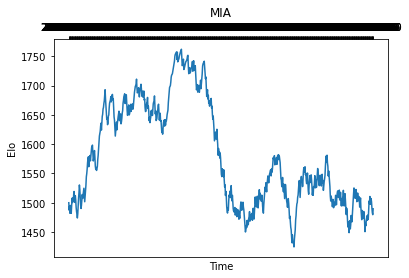

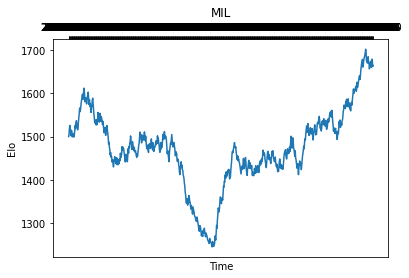

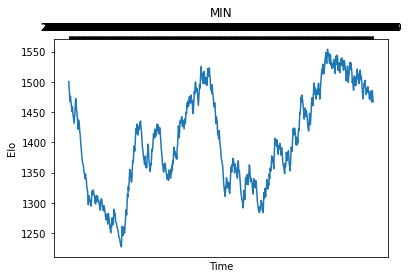

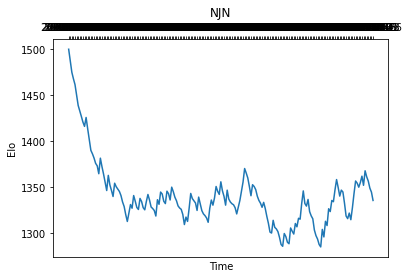

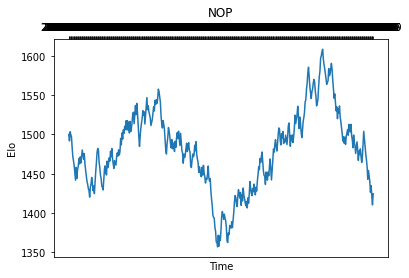

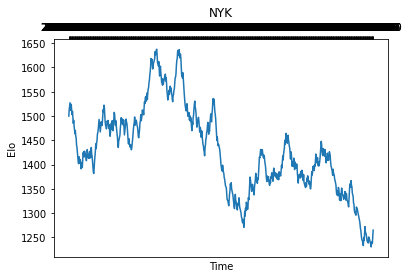

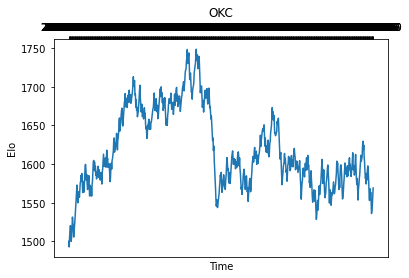

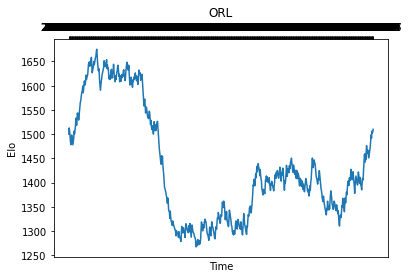

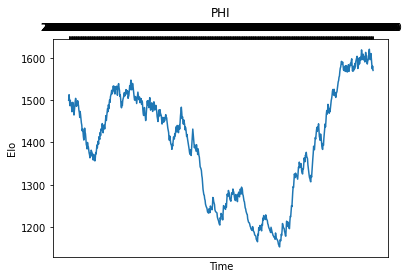

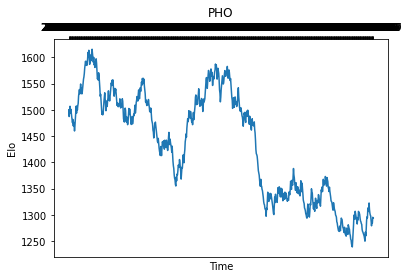

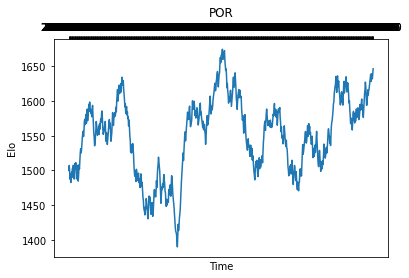

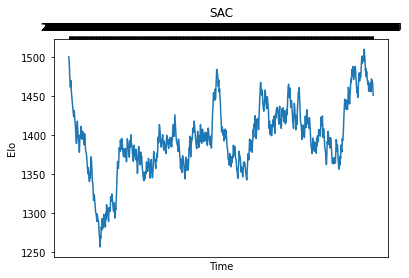

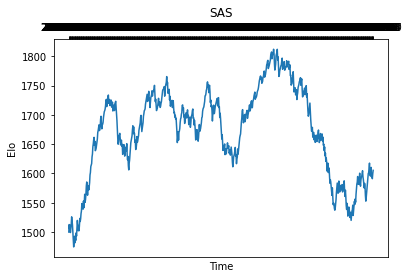

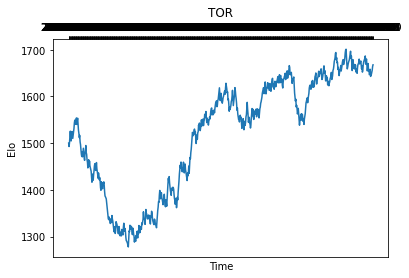

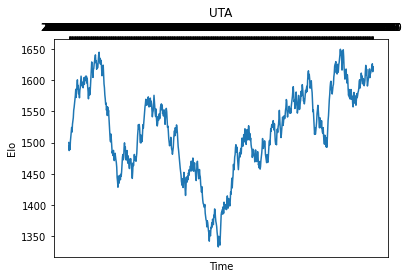

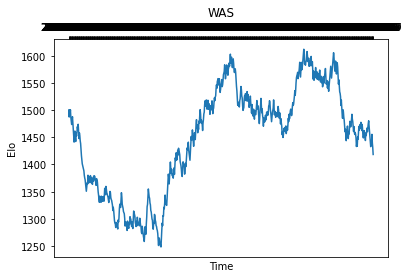

In [ ]:
import matplotlib.pyplot as plt

for i in list_of_df:
  plt.plot(i['Date'], i['Elo'])
  plt.title(i['Team'][0])
  plt.xlabel('Time')
  plt.ylabel('Elo')
  plt.show()

# original code

In [ ]:
#used to convert names to abbreviation
team_abb = {
"ATLANTA HAWKS" : "ATL",
"ST. LOUIS HAWKS" : "SLH",
"MILWAUKEE HAWKS" : "MIL",
"TRI-CITIES BLACKHAWKS" : "TCB",
"BOSTON CELTICS" : "BOS",
"BROOKLYN NETS" : "BRK",
"NEW JERSEY NETS" : "NJN",
"CHICAGO BULLS" : "CHI",
"CHARLOTTE HORNETS": "CHH",
"CHARLOTTE BOBCATS" : "CHA",
"CLEVELAND CAVALIERS" : "CLE",
"DALLAS MAVERICKS" : "DAL",
"DENVER NUGGETS" : "DEN",
"DETROIT PISTONS" : "DET",
"FORT WAYNE PISTONS" : "FWP",
"GOLDEN STATE WARRIORS" : "GSW",
"SAN FRANCISCO WARRIORS" : "SFW",
"PHILADELPHIA WARRIORS" : "PHI",
"HOUSTON ROCKETS" : "HOU",
"INDIANA PACERS" : "IND",
"LOS ANGELES CLIPPERS" : "LAC",
"SAN DIEGO CLIPPERS" : "SDC",
"BUFFALO BRAVES" : "BUF",
"LOS ANGELES LAKERS" : "LAL",
"MINNEAPOLIS LAKERS" : "MIN",
"MEMPHIS GRIZZLIES" : "MEM",
"VANCOUVER GRIZZLIES" : "VAN",
"MIAMI HEAT" : "MIA",
"MILWAUKEE BUCKS" : "MIL",
"MINNESOTA TIMBERWOLVES" : "MIN",
"NEW ORLEANS PELICANS" : "NOP",
"NEW ORLEANS/OKLAHOMA CITY HORNETS" : "NOK",
"NEW ORLEANS HORNETS" : "NOH",
"NEW YORK KNICKS" : "NYK",
"OKLAHOMA CITY THUNDER" : "OKC",
"SEATTLE SUPERSONICS" : "SEA",
"ORLANDO MAGIC" : "ORL",
"PHILADELPHIA 76ERS" : "PHI",
"SYRACUSE NATIONALS" : "SYR",
"PHOENIX SUNS" : "PHO",
"PORTLAND TRAIL BLAZERS" : "POR",
"SACRAMENTO KINGS" : "SAC",
"KANSAS CITY KINGS" : "KCK",
"KANSAS CITY-OMAHA KINGS" : "KCK",
"CINCINNATI ROYALS" : "CIN",
"ROCHESTER ROYALS" : "ROR",
"SAN ANTONIO SPURS" : "SAS",
"TORONTO RAPTORS" : "TOR",
"UTAH JAZZ" : "UTA",
"NEW ORLEANS JAZZ" : "NOJ",
"WASHINGTON WIZARDS" : "WAS",
"WASHINGTON BULLETS" : "WAS",
"CAPITAL BULLETS" : "CAP",
"BALTIMORE BULLETS" : "BAL",
"CHICAGO ZEPHYRS" : "CHI",
"CHICAGO PACKERS" : "CHI",
"ANDERSON PACKERS" : "AND",
"CHICAGO STAGS" : "CHI",
"INDIANAPOLIS OLYMPIANS" : "IND",
"SHEBOYGAN RED SKINS" : "SRS",
"ST. LOUIS BOMBERS" : "SLB",
"WASHINGTON CAPITOLS" : "WAS",
"WATERLOO HAWKS" : "WAT",
"SAN DIEGO ROCKETS" : "SDR"
}

In [ ]:
#Load data from csv
#convert to team players and the score
#creates player attendance table
from pandas.core.frame import DataFrame

season_df = pd.read_csv("seasons_00_19.csv")
players_df = pd.read_csv("players_00_19.csv")
predictGame_df = pd.DataFrame(columns=["Home1", "Home2", "Home3", "Home4", "Home5", "Home6", "Home7", "Home8", "Away1", "Away2", "Away3", "Away4", "Away5", "Away6", "Away7", "Away8","HomeWin"])
for i, g in season_df.iterrows():
  date = str(g["DATE"])[:10]
  year = int(date[:4])
  if year < 2010:
    continue
  teamAway = team_abb[g["VISITOR"].upper()]
  teamHome = team_abb[g["HOME"].upper()]
  if int(date[:4]) > 2013:
    if teamAway == "CHH":
      teamAway = "CHO"
    if teamHome == "CHH":
      teamHome = "CHO"
  gameId = (date + teamHome + teamAway).replace("-","")
  game_df = players_df[players_df["GAMEID"]==gameId]
  r = []
  for index, row in game_df.iterrows():
    playerName = row["PLAYER"]
    r.append(playerName)
  r.append(True if g["HOME_PTS"] > g["VISITOR_PTS"] else False)
  try:
    predictGame_df.loc[len(predictGame_df)]=r
  except:
    pass

#predictGame_df.to_csv("playerAttendence_2.csv")
predictGame_df.index = range(len(predictGame_df))
predictGame_df

In [ ]:
#dropping the first couple years to keep data more relavant

#predictGame_df = pd.read_csv("playerAttendence_REG.csv",index_col=0)[20343:].reset_index().drop("index",axis=1)
predictGame_df = pd.read_csv("playerAttendance.csv",index_col=0)[20343:24030].reset_index().drop("index",axis=1)
#predictGame_df = pd.read_csv("playerAttendance.csv",index_col=0)[18343:22030].reset_index().drop("index",axis=1)

In [ ]:
predictGame_df

,Home1,Home2,Home3,Home4,Home5,Home6,Home7,Home8,Away1,Away2,Away3,Away4,Away5,Away6,Away7,Away8,HomeWin
0,LeBron James,Kyrie Irving,J.R. Smith,Kevin Love,Tristan Thompson,Richard Jefferson,Mike Dunleavy,Channing Frye,Kristaps Porziņģis,Carmelo Anthony,Derrick Rose,Courtney Lee,Joakim Noah,Justin Holiday,Brandon Jennings,Lance Thomas,True
1,Damian Lillard,CJ McCollum,Al-Farouq Aminu,Maurice Harkless,Mason Plumlee,Allen Crabbe,Evan Turner,Ed Davis,Rudy Gobert,George Hill,Rodney Hood,Boris Diaw,Joe Johnson,Trey Lyles,Shelvin Mack,Joe Ingles,True
2,Kevin Durant,Stephen Curry,Klay Thompson,Draymond Green,Zaza Pachulia,Andre Iguodala,Ian Clark,Shaun Livingston,LaMarcus Aldridge,Kawhi Leonard,Tony Parker,Kyle Anderson,Pau Gasol,Jonathon Simmons,Manu Ginóbili,Patty Mills,False
3,Monta Ellis,Paul George,Myles Turner,Jeff Teague,Thaddeus Young,Rodney Stuckey,C.J. Miles,Al Jefferson,Deron Williams,Wesley Matthews,Dirk Nowitzki,Harrison Barnes,Andrew Bogut,J.J. Barea,Justin Anderson,Dwight Powell,True
4,Evan Fournier,Elfrid Payton,Serge Ibaka,Nikola Vučević,Aaron Gordon,Jeff Green,C.J. Watson,Mario Hezonja,Justise Winslow,Dion Waiters,Hassan Whiteside,Goran Dragić,Luke Babbitt,Tyler Johnson,James Johnson,Rodney McGruder,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,Damyean Dotson,Luke Kornet,Kevin Knox,Mitchell Robinson,Mario Hezonja,Kadeem Allen,John Jenkins,Isaiah Hicks,Andre Drummond,Reggie Jackson,Bruce Brown,Thon Maker,Wayne Ellington,Glenn Robinson III,Luke Kennard,Langston Galloway,False
3683,Zhaire Smith,Boban Marjanović,T.J. McConnell,Mike Scott,Furkan Korkmaz,Jonathon Simmons,Shake Milton,Amir Johnson,Ryan Arcidiacono,Timothé Luwawu-Cabarrot,Wayne Selden,Robin Lopez,Shaquille Harrison,Walt Lemon Jr.,Brandon Sampson,Cristiano Felício,True
3684,LaMarcus Aldridge,DeMar DeRozan,Derrick White,Bryn Forbes,Jakob Poeltl,Rudy Gay,Donatas Motiejūnas,Patty Mills,Devin Harris,Dwight Powell,Dirk Nowitzki,Jalen Brunson,Justin Jackson,Dorian Finney-Smith,Courtney Lee,Salah Mejri,True
3685,Gary Harris,Nikola Jokić,Jamal Murray,Will Barton,Paul Millsap,Monte Morris,Malik Beasley,Mason Plumlee,Andrew Wiggins,Gorgui Dieng,Tyus Jones,Dario Šarić,Josh Okogie,Cameron Reynolds,Anthony Tolliver,Keita Bates-Diop,True


In [ ]:
# Create a matrix of size 2n+1 * m
# Where n is the total number of players in the league, and m is the number of games played
# Each row corresponds to a game. Each column corresponds to a player. The first n columns represent the home team. The second n columns represent the away team.
# If that player played on that team for that game, then the cell is = 1. Else, = 0
# The final column = 1 if the home team won the game

from pandas.core.frame import DataFrame

unique_players = np.unique(predictGame_df[["Home1", "Home2", "Home3", "Home4", "Home5", "Home6", "Home7", "Home8", "Away1", "Away2", "Away3", "Away4", "Away5", "Away6", "Away7", "Away8"]].values)
unique_players_an_winner = np.append(unique_players, 'Winner')
classification = DataFrame(0, index=np.arange(len(predictGame_df)), columns = unique_players_an_winner)

classification_only_home = DataFrame(0, index=np.arange(len(predictGame_df)), columns = unique_players)
classification_only_away = DataFrame(0, index=np.arange(len(predictGame_df)), columns = unique_players)
classification_only_winner = DataFrame(0, index=np.arange(len(predictGame_df)), columns = ["Winner"])

for index, row in predictGame_df.iterrows():
  if row['HomeWin'] == True:
    classification_only_winner.at[int(index), 'Winner'] = 1

  row = row.drop(labels=['HomeWin'])

  for i in range(16):
    if i < 8:
      classification_only_home.at[int(index), row[i]] = 1
    else:
      classification_only_away.at[int(index), row[i]] = 1

unique_players_home = []
unique_players_away = []

for i in unique_players:
  unique_players_home.append(i + " (HOME)")
  unique_players_away.append(i + " (AWAY)")

classification_only_home.columns = unique_players_home
classification_only_away.columns = unique_players_away

classification2 = classification_only_home.join(classification_only_away)
classification2 = classification2.join(classification_only_winner)


In [ ]:
classification2

,A.J. Hammons (HOME),Aaron Brooks (HOME),Aaron Gordon (HOME),Aaron Harrison (HOME),Aaron Holiday (HOME),Aaron Jackson (HOME),Abdel Nader (HOME),Adreian Payne (HOME),Al Horford (HOME),Al Jefferson (HOME),...,Xavier Rathan-Mayes (AWAY),Yogi Ferrell (AWAY),Yuta Watanabe (AWAY),Zach Collins (AWAY),Zach LaVine (AWAY),Zach Randolph (AWAY),Zaza Pachulia (AWAY),Zhaire Smith (AWAY),Zhou Qi (AWAY),Winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Prediction Models

TEST SPLIT

In [ ]:
# Begin by importing all necessary libraries
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
y = classification2['Winner']
X = classification2.drop('Winner', axis = 1)
#test on the last 1230 games of the dataset
#corresponds to the 2019 season
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.80)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

LOG REG

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.6775067750677507


KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6788617886178862
Precision: 0.6985138004246284
Recall: 0.7759433962264151


In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1))
n_neighbors = list(range(20,40))
p=[1]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 0
Best p: 1
Best n_neighbors: 38


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors = best_model.best_estimator_.get_params()['n_neighbors'],
                           p = best_model.best_estimator_.get_params()['p'],
                           leaf_size = best_model.best_estimator_.get_params()['leaf_size'])
knn.fit(X_train, y_train)
#Predict test data set.
y_pred = knn.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.67      0.43      0.53       314
           1       0.67      0.84      0.75       424

    accuracy                           0.67       738
   macro avg       0.67      0.64      0.64       738
weighted avg       0.67      0.67      0.65       738



0.6387303208748949

DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.5623306233062331
Precision: 0.6100217864923747
Recall: 0.660377358490566


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf = clf.fit(X_train,y_train) 

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6111111111111112
Precision: 0.6290018832391714
Recall: 0.7877358490566038


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

clf = clf.fit(X_train,y_train) 

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6205962059620597
Precision: 0.6374045801526718
Recall: 0.7877358490566038


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 

clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6246612466124661
Precision: 0.6273830155979203
Recall: 0.8537735849056604


In [ ]:
clf = RandomForestClassifier(n_estimators = 200) 

clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6449864498644986
Precision: 0.6363636363636364
Recall: 0.8915094339622641


In [ ]:
clf = RandomForestClassifier(n_estimators = 50) 

clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6273712737127372
Precision: 0.6382189239332097
Recall: 0.8113207547169812


In [ ]:
clf = RandomForestClassifier(n_estimators = 500) 

clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6355013550135501
Precision: 0.6302521008403361
Recall: 0.8844339622641509


SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6883468834688347
Precision: 0.7046413502109705
Recall: 0.7877358490566038


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='poly')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6720867208672087
Precision: 0.6736641221374046
Recall: 0.8325471698113207


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6951219512195121
Precision: 0.6932038834951456
Recall: 0.8419811320754716


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='sigmoid')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.6761517615176151
Precision: 0.6768642447418738
Recall: 0.8349056603773585


VOTING CLASSIFIER

In [ ]:
from sklearn import svm

SVC_model = svm.SVC()

KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))

print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.6951219512195121
0.6368563685636857
[[156  67]
 [158 357]]
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       280
           1       0.72      0.67      0.70       458

    accuracy                           0.64       738
   macro avg       0.62      0.63      0.62       738
weighted avg       0.65      0.64      0.64       738



MLP CLASSIFIER

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(300,300,50), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(accuracy_score(y_test,predict_test))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

0.6327913279132791


# Misc Code

In [ ]:
# Data loader for regression model

season_df = pd.read_csv("seasons_00_19.csv")
players_df = pd.read_csv("players_00_19.csv")
predictGame_df = pd.DataFrame(columns=["Home1", "Home2", "Home3", "Home4", "Home5", "Home6", "Home7", "Home8", "Away1", "Away2", "Away3", "Away4", "Away5", "Away6", "Away7", "Away8", "PointDiff"])

for i, g in season_df.iterrows():
  date = str(g["DATE"])[:10]
  if i % 500 == 0:
    print(date)
  teamAway = team_abb[g["VISITOR"].upper()]
  teamHome = team_abb[g["HOME"].upper()]
  if int(date[:4]) > 2013:
    if teamAway == "CHH":
      teamAway = "CHO"
    if teamHome == "CHH":
      teamHome = "CHO"
  gameId = (date + teamHome + teamAway).replace("-","")
  game_df = players_df[players_df["GAMEID"]==gameId]
  r = []
  for index, row in game_df.iterrows():
    playerName = row["PLAYER"]
    r.append(playerName)
  r.append(int(g["HOME_PTS"]) - int(g["VISITOR_PTS"]))
  try:
    predictGame_df.loc[len(predictGame_df)]=r
  except:
    pass
predictGame_df.to_csv("playerAttendence_REG.csv")
predictGame_df

In [ ]:
# Unique labeller for regression
unique_players = np.unique(predictGame_df[["Home1", "Home2", "Home3", "Home4", "Home5", "Home6", "Home7", "Home8", "Away1", "Away2", "Away3", "Away4", "Away5", "Away6", "Away7", "Away8"]].values)
unique_players_an_winner = np.append(unique_players, 'PointDiff')
classification = DataFrame(0, index=np.arange(len(predictGame_df)), columns = unique_players_an_winner)

classification_only_home = DataFrame(0, index=np.arange(len(predictGame_df)), columns = unique_players)
classification_only_away = DataFrame(0, index=np.arange(len(predictGame_df)), columns = unique_players)
classification_only_winner = DataFrame(0, index=np.arange(len(predictGame_df)), columns = ["Winner"])

for index, row in predictGame_df.iterrows():
  classification_only_winner.at[int(index), 'PointDiff'] = row['PointDiff']

  row = row.drop(labels=['PointDiff'])

  for i in range(16):
    if i < 8:
      classification_only_home.at[int(index), row[i]] = 1
    else:
      classification_only_away.at[int(index), row[i]] = 1

unique_players_home = []
unique_players_away = []

for i in unique_players:
  unique_players_home.append(i + " (HOME)")
  unique_players_away.append(i + " (AWAY)")

classification_only_home.columns = unique_players_home
classification_only_away.columns = unique_players_away

classification2 = classification_only_home.join(classification_only_away)
classification2 = classification2.join(classification_only_winner)

In [ ]:
classification2 = classification2.astype('float64')
classification2.dtypes

In [ ]:
d = pd.DataFrame(np.ones((classification2.shape[0], 1)))
for index, row in d.iterrows():
  d[0][index] = (int(index) + 1) / d.shape[0]
classification2 = classification2.multiply(d[0], axis='index')

In [ ]:
#Data loader with team Elo
season_df = pd.read_csv("seasons_00_19.csv")
players_df = pd.read_csv("players_00_19.csv")
predictGame_df = pd.DataFrame(columns=["Home1", "Home2", "Home3", "Home4", "Home5", "Home6", "Home7", "Home8", "Away1", "Away2", "Away3", "Away4", "Away5", "Away6", "Away7", "Away8","HomeWin", "HomeElo","AwayElo"])
elo_df = pd.read_csv("elo.csv")
for i, g in season_df.iterrows():
  date = str(g["DATE"])[:10]
  #if i % 500 == 0:
    #print(date)
  year = int(date[:4])
  if year < 2010:
    continue
  teamAway = team_abb[g["VISITOR"].upper()]
  teamHome = team_abb[g["HOME"].upper()]
  if int(date[:4]) > 2013:
    if teamAway == "CHH":
      teamAway = "CHO"
    if teamHome == "CHH":
      teamHome = "CHO"
  gameId = (date + teamHome + teamAway).replace("-","")
  game_df = players_df[players_df["GAMEID"]==gameId]
  r = []
  for index, row in game_df.iterrows():
    playerName = row["PLAYER"]
    r.append(playerName)
  r.append(True if g["HOME_PTS"] > g["VISITOR_PTS"] else False)
  r = r + (elo_df.loc[elo_df["GAMEID"] == gameId][["HOME_ELO","AWAY_ELO"]].values.flatten().tolist())
  try:
    predictGame_df.loc[len(predictGame_df)]=r
  except:
    pass
  

#predictGame_df.to_csv("playerAttendence_2.csv")
predictGame_df.index = range(len(predictGame_df))
predictGame_df

In [ ]:
temp2_df = pd.concat([classification2, temp_df[["HomeElo","AwayElo"]]],axis=1)
temp2_df